# Covid Case Study with Python
## Imports and Settings

In [15]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib import ticker

matplotlib.rcParams['figure.figsize'] = (30,10)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1000)


all_countries = pd.read_csv('owid-covid-data.csv')

## Cleaning and Filtering Data Set

In [3]:
usa = all_countries[all_countries['location']=='United States']
[usa['date'].min(),
usa['date'].max()]

['2020-01-22', '2022-02-22']

In [4]:
usa.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
154826,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
154827,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
154828,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
154829,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
154830,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-8925.0,-3.59,-2.63,-26.808639


In [5]:
usa.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
usa = usa[['location','date','total_cases','new_cases','total_deaths','new_deaths','icu_patients','hosp_patients','new_tests','total_tests','total_vaccinations',
          'people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations','population']]

In [7]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 154826 to 155588
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 763 non-null    object 
 1   date                     763 non-null    object 
 2   total_cases              763 non-null    float64
 3   new_cases                762 non-null    float64
 4   total_deaths             725 non-null    float64
 5   new_deaths               725 non-null    float64
 6   icu_patients             587 non-null    float64
 7   hosp_patients            587 non-null    float64
 8   new_tests                717 non-null    float64
 9   total_tests              717 non-null    float64
 10  total_vaccinations       437 non-null    float64
 11  people_vaccinated        437 non-null    float64
 12  people_fully_vaccinated  437 non-null    float64
 13  total_boosters           194 non-null    float64
 14  new_vaccinations  

In [8]:
usa = usa.fillna(0)

In [9]:
for col in usa.columns:
    if usa[col].dtype == 'float64':
        usa[col] = usa[col].astype('int64')

In [10]:
usa

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
154826,United States,2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154827,United States,2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154828,United States,2020-01-24,2,1,0,0,0,0,0,0,0,0,0,0,0,332915074
154829,United States,2020-01-25,2,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154830,United States,2020-01-26,5,3,0,0,0,0,0,0,0,0,0,0,0,332915074
154831,United States,2020-01-27,5,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154832,United States,2020-01-28,5,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154833,United States,2020-01-29,6,1,0,0,0,0,0,0,0,0,0,0,0,332915074
154834,United States,2020-01-30,6,0,0,0,0,0,0,0,0,0,0,0,0,332915074
154835,United States,2020-01-31,8,2,0,0,0,0,0,0,0,0,0,0,0,332915074


In [11]:
usa.describe()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
count,7.630000e+02,7.630000e+02,763.000000,763.000000,763.000000,763.000000,7.630000e+02,7.630000e+02,7.630000e+02,7.630000e+02,7.630000e+02,7.630000e+02,7.630000e+02,763.0
mean,2.455143e+07,1.030782e+05,416934.243775,1230.752294,11361.239843,46114.625164,1.057341e+06,3.115745e+08,1.779551e+08,9.340775e+07,7.726682e+07,1.061201e+07,7.220140e+05,332915074.0
std,2.083694e+07,1.485498e+05,283135.649996,1001.916502,8770.166996,39735.079778,6.526564e+05,2.522550e+08,2.003525e+08,1.005307e+08,8.742059e+07,2.513838e+07,9.383636e+05,0.0
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,332915074.0
25%,4.511990e+06,2.820050e+04,153236.500000,461.500000,3765.000000,13005.000000,5.984740e+05,5.852505e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,332915074.0
50%,2.708406e+07,5.656100e+04,467930.000000,964.000000,10437.000000,39012.000000,1.011967e+06,3.089314e+08,4.887028e+07,3.621830e+07,1.167674e+07,0.000000e+00,3.944850e+05,332915074.0
75%,3.692580e+07,1.249215e+05,621852.500000,1825.500000,17716.500000,69622.500000,1.531332e+06,5.026269e+08,3.643166e+08,1.994293e+08,1.729908e+08,1.221610e+05,1.130373e+06,332915074.0
max,7.864865e+07,1.368120e+06,939064.000000,4442.000000,28891.000000,154536.000000,3.116622e+06,8.067515e+08,5.509249e+08,2.530557e+08,2.142092e+08,9.309454e+07,4.542790e+06,332915074.0


In [12]:
# Looking at sums of the 'new' columns to verify they match the 'total' columns they are associated with.

[usa['new_cases'].sum(), usa['new_deaths'].sum(), usa['new_tests'].sum()]

[78648650, 939064, 806751537]

## Creating Aggregates of Other Columns for Analysis

In [13]:
usa['vaccinated_percent'] = usa['people_vaccinated']/usa['population']*100
usa['infected_percent'] = usa['total_cases']/usa['population']*100
usa['death_percent'] = usa['total_deaths']/usa['population']*100
usa['icu_percent'] = usa['icu_patients']/usa['total_cases']*100
usa['hosp_percent'] = usa['hosp_patients']/usa['total_cases']*100

## Visual Analysis of Covid-19 Progression Over Time

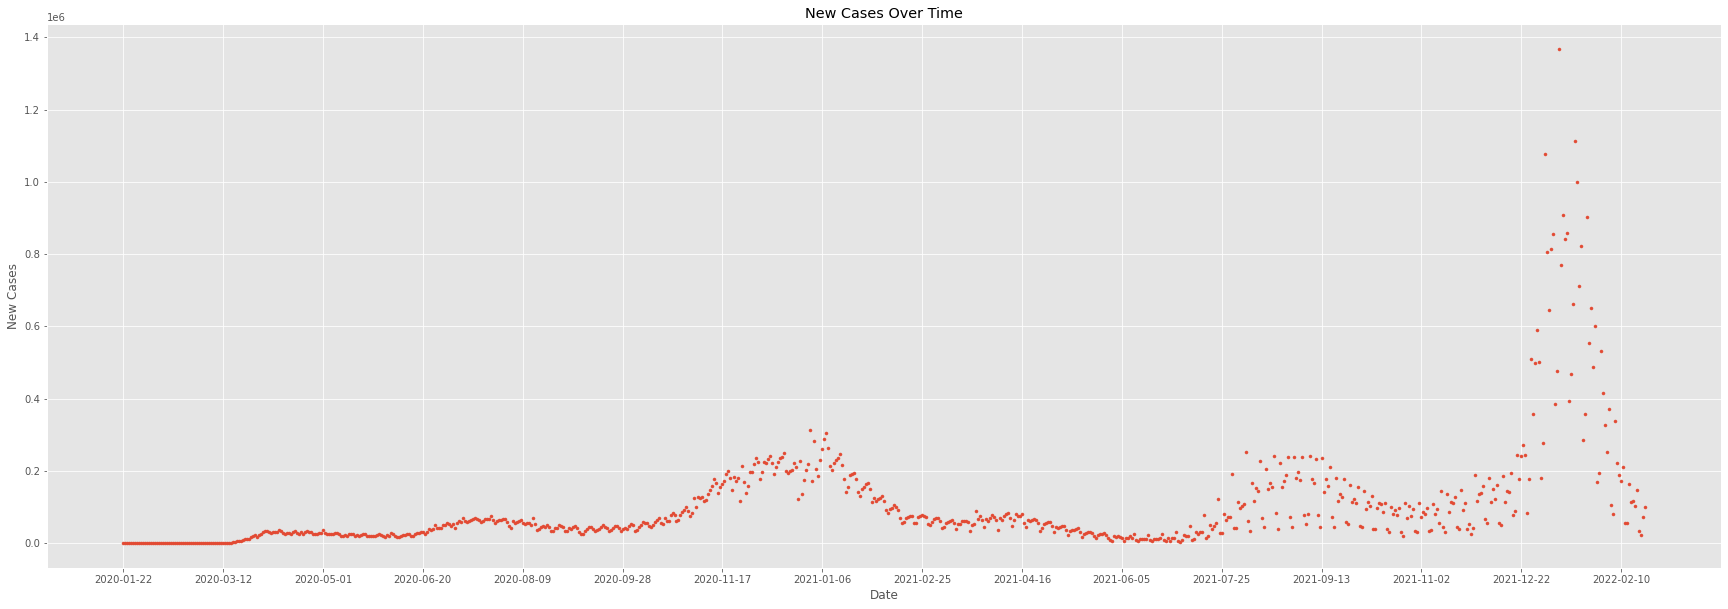

In [18]:
plt.scatter(x=usa['date'], y=usa['new_cases'], marker='.')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(np.arange(0,len(usa['date']),50))

plt.show()

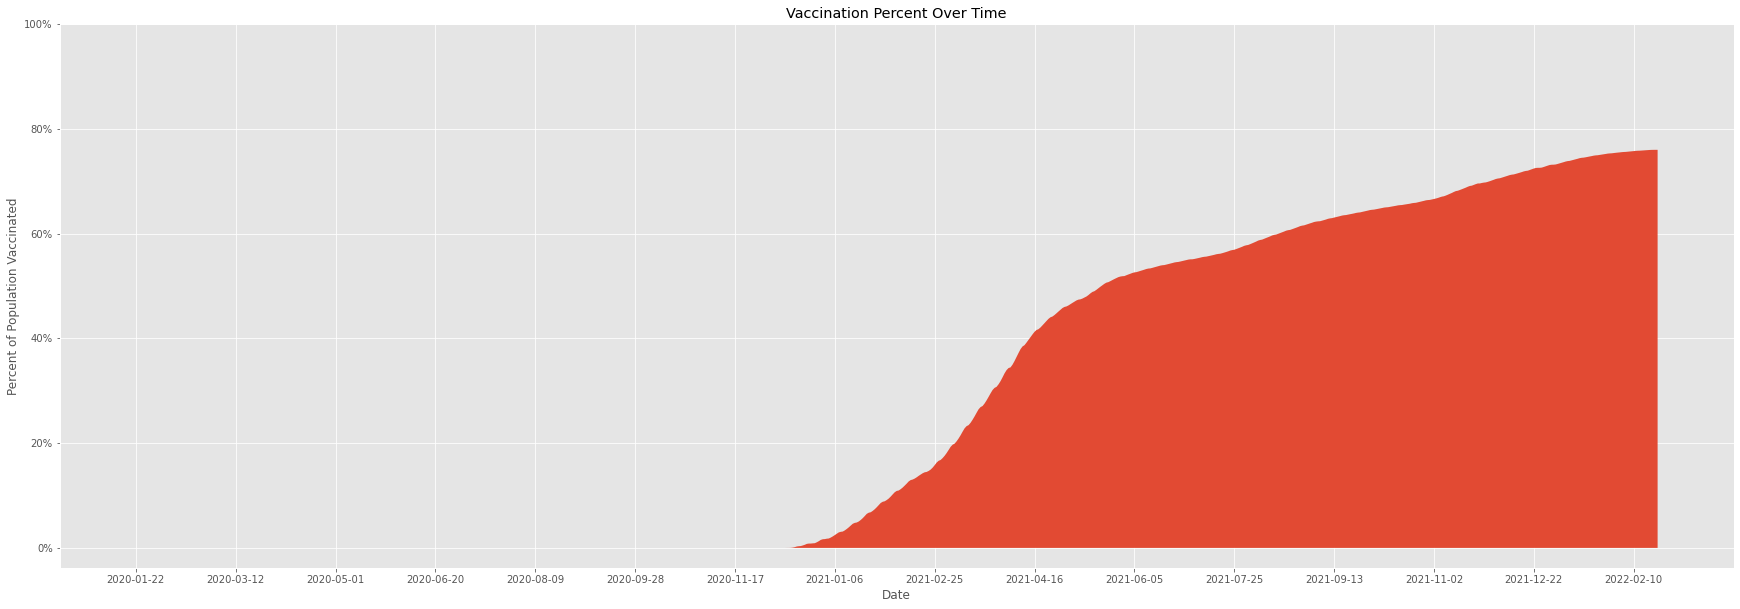

In [43]:
plt.fill_between(x=usa['date'],y1= 0, y2=usa['vaccinated_percent'])
plt.title('Vaccination Percent Over Time')
plt.xlabel('Date')
plt.ylabel('Percent of Population Vaccinated')
plt.xticks(np.arange(0,len(usa['date']),50))
plt.yticks(np.arange(0,101,20),['0%','20%','40%','60%','80%','100%'])

plt.show()

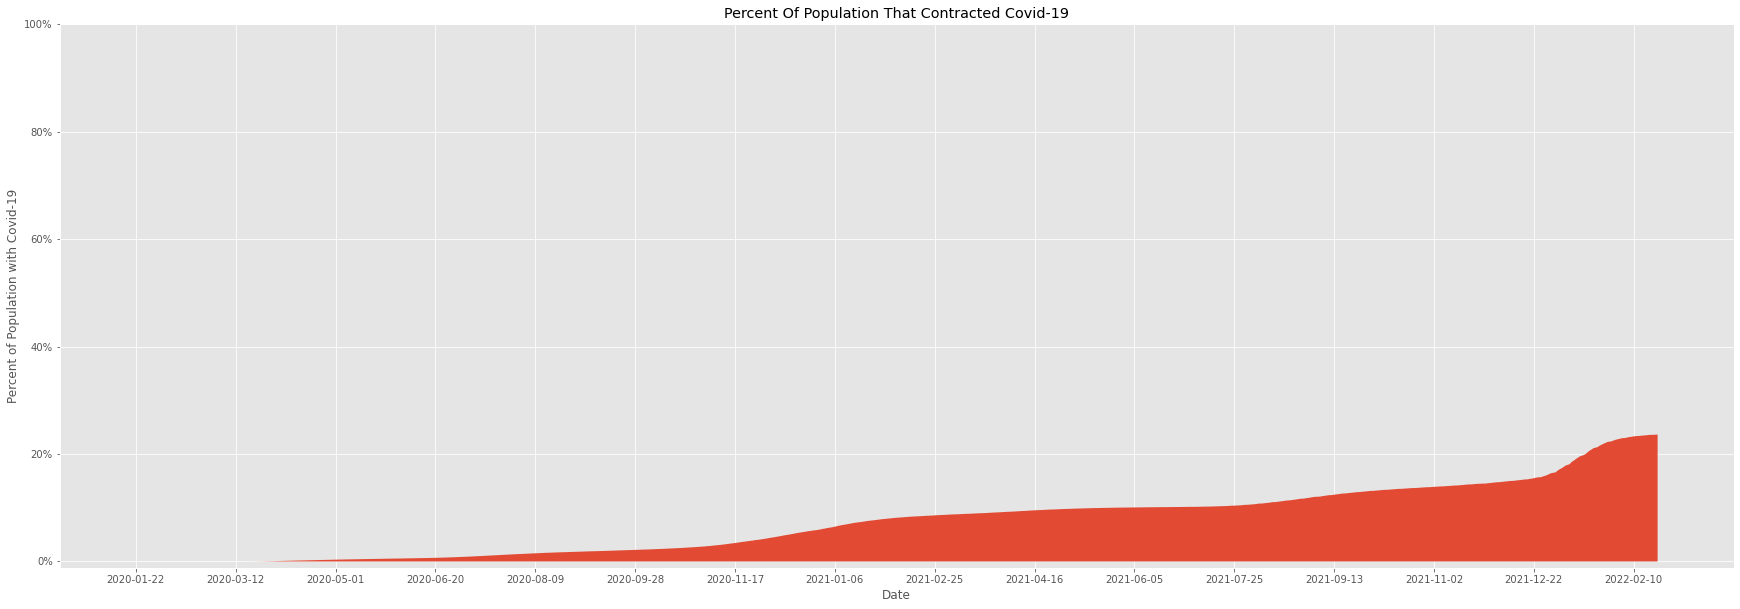

In [44]:
plt.fill_between(x=usa['date'],y1= 0, y2=usa['infected_percent'])
plt.title('Percent Of Population That Contracted Covid-19')
plt.xlabel('Date')
plt.ylabel('Percent of Population with Covid-19')
plt.xticks(np.arange(0,len(usa['date']),50))
plt.yticks(np.arange(0,101,20),['0%','20%','40%','60%','80%','100%'])

plt.show()

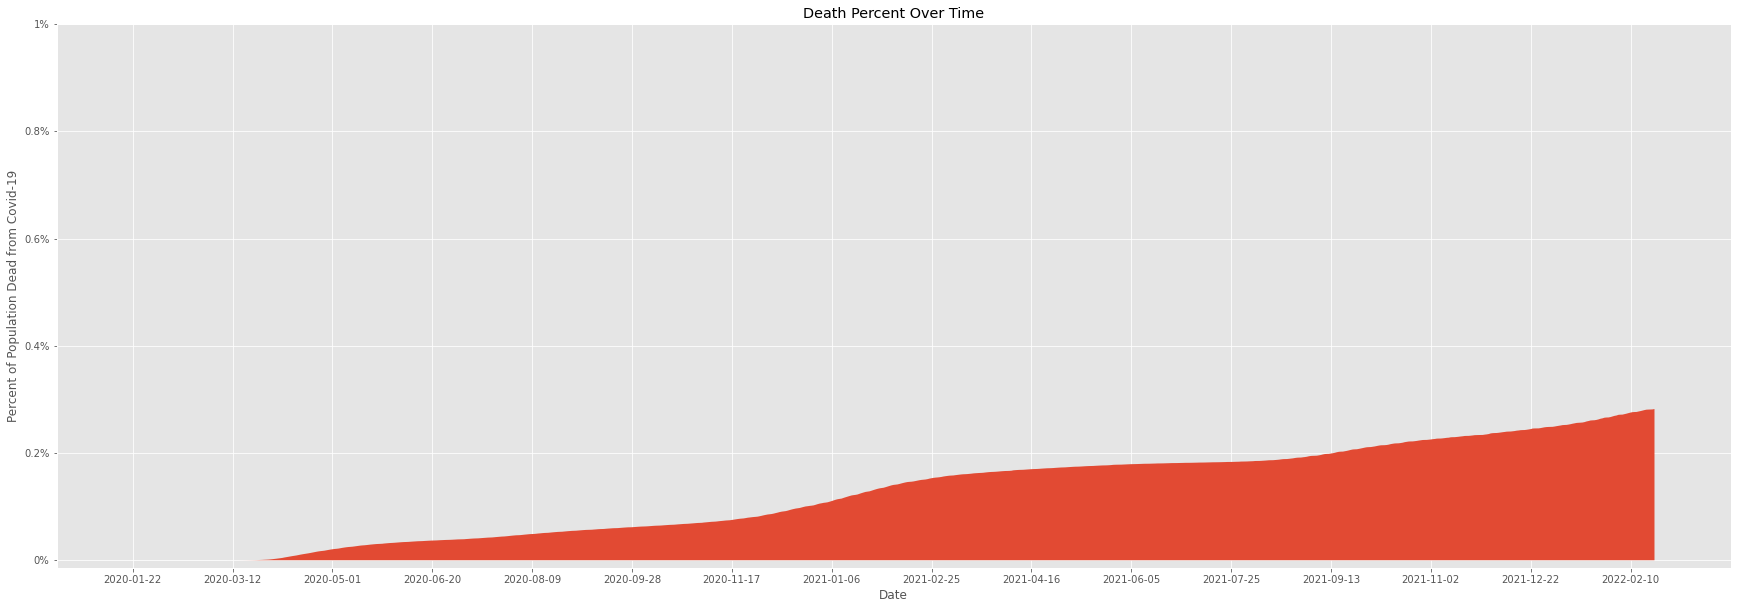

In [49]:
plt.fill_between(x=usa['date'],y1= 0, y2=usa['death_percent'])
plt.title('Death Percent Over Time')
plt.xlabel('Date')
plt.ylabel('Percent of Population Dead from Covid-19')
plt.xticks(np.arange(0,len(usa['date']),50))
plt.yticks(np.arange(0,1.1,.2),['0%','0.2%','0.4%','0.6%','0.8%','1%'])

plt.show()

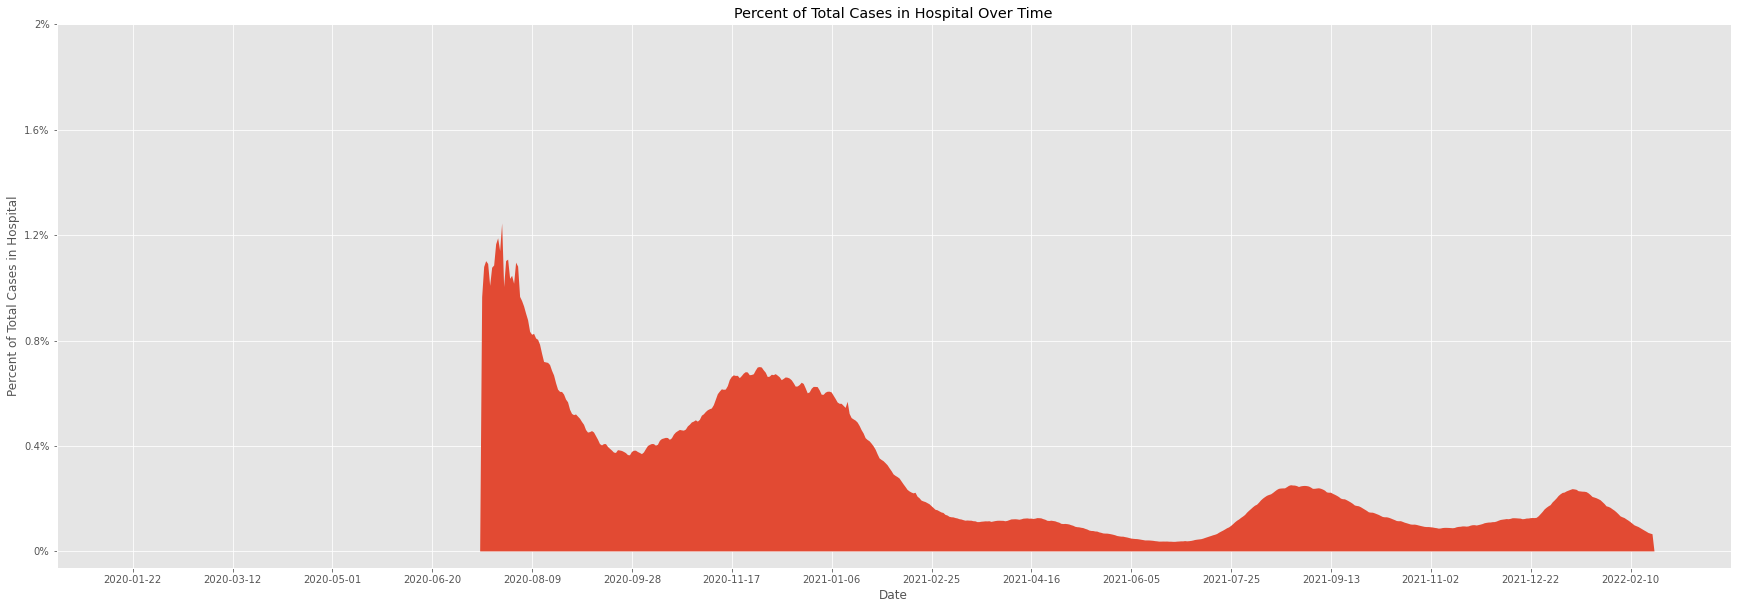

In [52]:
plt.fill_between(x=usa['date'],y1= 0, y2=usa['hosp_percent'])
plt.title('Percent of Total Cases in Hospital Over Time')
plt.xlabel('Date')
plt.ylabel('Percent of Total Cases in Hospital')
plt.xticks(np.arange(0,len(usa['date']),50))
plt.yticks(np.arange(0,2.1,.4),['0%','0.4%','0.8%','1.2%','1.6%','2%'])

plt.show()

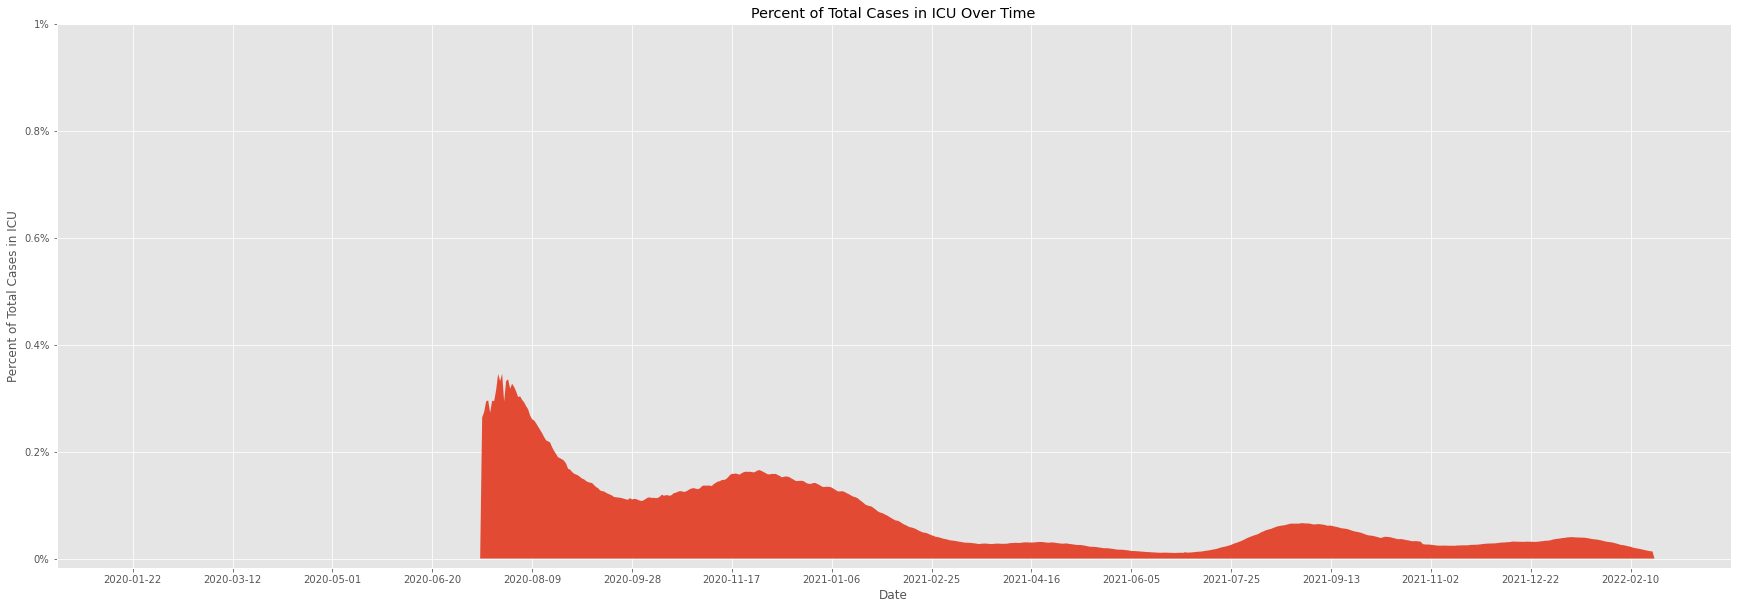

In [53]:
plt.fill_between(x=usa['date'],y1= 0, y2=usa['icu_percent'])
plt.title('Percent of Total Cases in ICU Over Time')
plt.xlabel('Date')
plt.ylabel('Percent of Total Cases in ICU')
plt.xticks(np.arange(0,len(usa['date']),50))
plt.yticks(np.arange(0,1.1,.2),['0%','0.2%','0.4%','0.6%','0.8%','1%'])

plt.show()